In [58]:
%load_ext autoreload
%autoreload 2


from diffusion_opt.experiment_aggregation import Experiment, ExperimentSummary



# set up matplotlib

import matplotlib.pyplot as plt
from tueplots import bundles
from tueplots import figsizes, fontsizes

plt.rcParams.update(bundles.neurips2023())
figsize = figsizes.neurips2023(ncols=1)
plt.rcParams.update(figsize)

new_font_size = {k: v*1.8 for k,v in fontsizes.neurips2023().items()}
plt.rcParams.update(new_font_size)
figsize



sizes = figsizes.neurips2023(ncols=1)
new_figsize = sizes['figure.figsize'][0], sizes['figure.figsize'][1] /2.0

sizes = figsizes.neurips2023(ncols=1)
new_figsize = sizes['figure.figsize'][0], sizes['figure.figsize'][1] /2.0
figsize_full = sizes['figure.figsize'][0], sizes['figure.figsize'][1]
figsize_75 = sizes['figure.figsize'][0], sizes['figure.figsize'][1] * 0.75
figsize_25 = sizes['figure.figsize'][0], sizes['figure.figsize'][1] * 0.25
figsize_40 = sizes['figure.figsize'][0], sizes['figure.figsize'][1] * 0.4
figsize_30 = sizes['figure.figsize'][0], sizes['figure.figsize'][1] * 0.3
figsize_70 = sizes['figure.figsize'][0], sizes['figure.figsize'][1] * 0.7


# COLORS = "#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"

COLORS = "#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"


COLORS_FLOATING_POINT = [
    (0.368,0.507,0.71), # blue
    (0.881,0.611,0.142), # orange
    (.56,0.692,0.195), # green
    (0.923,0.386,0.209), # red
    (0.528,0.471,0.701), # purple
    (0.772,0.432,0.102), # brown
    (0.364,0.619,0.782) # cyan
]

# AL group color scheme
COLORS = []
for (r,g,b) in COLORS_FLOATING_POINT:
    # print("#%02x%02x%02x" % (int(r*255), int(g*255), int(b*255)))
    COLORS.append("#%02x%02x%02x" % (int(r*255), int(g*255), int(b*255)))





The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# W_e plot

In [59]:
# plotting recompute
import os
import smart_settings
import solo_legged_gym
import solo_legged_gym.envs # needed
from smodice import utils
import sys
sys.argv = ['', '']
import torch
import numpy as np
import pickle
from smodice.doi_pytorch_v2 import DOI

job_id = 186

wdir1 = "arxiv_learned_lambda_solo_semi_num_expert_sweep"
wdir2 = "arxiv_learned_lambda_solo_tracking_error_after_fix"
wdir3 = "arxiv_learned_lambda_solo_tracking_error_random"
wdir4 = "arxiv_learned_lambda_solo_tracking_error_lmbda_sweep"
figdir = "figures_new_lamdbda_lr"
wdir = wdir4

working_dir = f"/is/cluster/fast/mvlastelica/doi-offline-skill/corl_solo_fixed_lambda/working_directories/{job_id}"
# working_dir = "/is/cluster/fast/mvlastelica/doi-offline-skill/corl_solo_fixed_lambda/working_directories/49"
working_dir = f"/is/cluster/fast/mvlastelica/doi-offline-skill/{wdir}/working_directories/{job_id}"
# smodice
working_dir = f"/is/cluster/fast/mvlastelica/doi-offline-skill/{wdir}/working_directories/1"


os.listdir(working_dir)


config = smart_settings.load(os.path.join(working_dir, "config.yaml"), make_immutable=False)

ckpt = torch.load(os.path.join(working_dir, "checkpoints/last.pth.tar"))


os.makedirs(figdir, exist_ok=True)





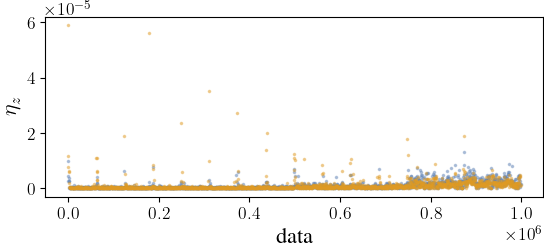

In [60]:
import matplotlib.pyplot as plt




w_e_expert = ckpt['state_dict']['network_states']['w_e_expert'].cpu().numpy()
w_e_skills = ckpt['state_dict']['network_states']['w_e_skills'].cpu().numpy()



w_e_expert.min(), w_e_skills[0].min(), w_e_expert.max(), w_e_skills[0].max(), w_e_skills.shape







x = np.arange(0, w_e_expert.shape[1])

sub = 500
sub_s_expert = w_e_expert[0, ::sub]
sub_x = x[::sub]






fig, ax = plt.subplots(1,1, figsize=figsize_75)
for i, w_e_skill in enumerate([w_e_skills[0], w_e_expert[0]]):
    ax.scatter(sub_x, w_e_skill[::sub], color=COLORS[i], alpha=0.4, s=10.0, marker=".")

ax.set_xlabel("data")
ax.set_ylabel("$\eta_z$")
# ax.set_ylim(-0.5e-6, 0.3e-5)
fig.savefig(f"{figdir}/eta_z_E.pdf", bbox_inches='tight')





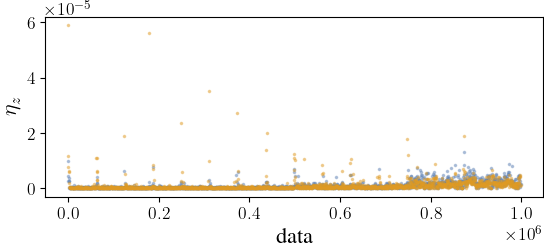

In [61]:
import matplotlib.pyplot as plt




w_e_expert = ckpt['state_dict']['network_states']['w_e_expert'].cpu().numpy()
w_e_skills = ckpt['state_dict']['network_states']['w_e_skills'].cpu().numpy()



w_e_expert.min(), w_e_skills[0].min(), w_e_expert.max(), w_e_skills[0].max(), w_e_skills.shape







x = np.arange(0, w_e_expert.shape[1])

sub = 500
sub_s_expert = w_e_expert[0, ::sub]
sub_x = x[::sub]






fig, ax = plt.subplots(1,1, figsize=figsize_75)
for i, w_e_skill in enumerate([w_e_skills[0], w_e_expert[0]]):
    ax.scatter(sub_x, w_e_skill[::sub], color=COLORS[i], alpha=0.4, s=10.0, marker=".")

ax.set_xlabel("data")
ax.set_ylabel("$\eta_z$")
# ax.set_ylim(-0.5e-6, 0.3e-5)
fig.savefig(f"{figdir}/eta_z_E.pdf", bbox_inches='tight')





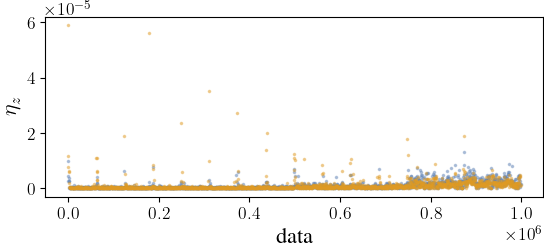

In [62]:
import matplotlib.pyplot as plt




w_e_expert = ckpt['state_dict']['network_states']['w_e_expert'].cpu().numpy()
w_e_skills = ckpt['state_dict']['network_states']['w_e_skills'].cpu().numpy()



w_e_expert.min(), w_e_skills[0].min(), w_e_expert.max(), w_e_skills[0].max(), w_e_skills.shape







x = np.arange(0, w_e_expert.shape[1])

sub = 500
sub_s_expert = w_e_expert[0, ::sub]
sub_x = x[::sub]






fig, ax = plt.subplots(1,1, figsize=figsize_75)
for i, w_e_skill in enumerate([w_e_skills[0], w_e_expert[0]]):
    ax.scatter(sub_x, w_e_skill[::sub], color=COLORS[i], alpha=0.4, s=10.0, marker=".")

ax.set_xlabel("data")
ax.set_ylabel("$\eta_z$")
# ax.set_ylim(-0.5e-6, 0.3e-5)
fig.savefig(f"{figdir}/eta_z_E.pdf", bbox_inches='tight')





(-5e-07, 3e-06)

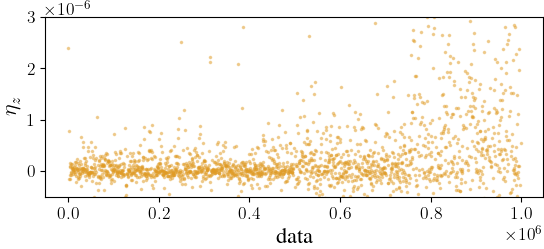

In [63]:



x = np.arange(0, w_e_expert.shape[1])

sub = 500
sub_s_expert = w_e_expert[0, ::sub]
sub_x = x[::sub]






fig, ax = plt.subplots(1,1, figsize=figsize_75)
w_e_skill = w_e_skills[0]

log =  np.log(w_e_skill[::sub]/w_e_expert[0][::sub])

ax.scatter(sub_x, w_e_skill[::sub]*log, color=COLORS[i], alpha=0.4, s=10.0, marker=".")

ax.set_xlabel("data")
ax.set_ylabel("$\eta_z$")
ax.set_ylim(-0.5e-6, 0.3e-5)


In [64]:







import matplotlib.pyplot as plt
from tueplots import bundles
from tueplots import figsizes, fontsizes

plt.rcParams.update(bundles.neurips2023())
figsize = figsizes.neurips2023(ncols=1)
plt.rcParams.update(figsize)

new_font_size = {k: v*1.8 for k,v in fontsizes.neurips2023().items()}
plt.rcParams.update(new_font_size)
figsize

import numpy as np


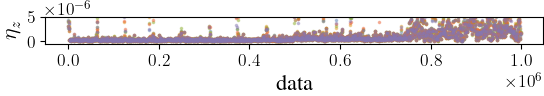

In [65]:



x = np.arange(0, w_e_expert.shape[1])

sub = 500
sub_s_expert = w_e_expert[0, ::sub]
sub_x = x[::sub]






fig, ax = plt.subplots(1,1, figsize=figsize_30)
for i, w_e_skill in enumerate(w_e_skills):
    ax.scatter(sub_x, w_e_skill[::sub], color=COLORS[i], alpha=0.4, s=10.0, marker=".")

ax.set_xlabel("data")
ax.set_ylabel("$\eta_z$")
ax.set_ylim(-0.5e-6, 0.5e-5)
fig.savefig(f"figdir/eta_z_30.pdf", bbox_inches='tight')



In [66]:
fontsizes.neurips2023()

{'font.size': 9,
 'axes.labelsize': 9,
 'legend.fontsize': 7,
 'xtick.labelsize': 7,
 'ytick.labelsize': 7,
 'axes.titlesize': 9}

# Plot lambda vs. l1

In [67]:
paths = [f"/is/cluster/fast/mvlastelica/doi-offline-skill/{wdir}"]
# paths = ["/is/cluster/fast/mvlastelica/doi-offline-skill/corl_solo_fixed_lambda"]
experiments = Experiment.extract_experiments(
    paths, load_h5=True, load_tensorboard=False, load_metrics=False
)


  2%|▏         | 2/90 [00:00<00:08, 10.18it/s]

100%|██████████| 90/90 [00:08<00:00, 10.95it/s]


In [68]:
summary = ExperimentSummary(experiments)

idxs = summary.unique_indexes()
idxs

[(0.0, 1),
 (0.0, 10),
 (0.0, 100),
 (1.0, 1),
 (1.0, 10),
 (1.0, 100),
 (1.5, 1),
 (1.5, 10),
 (1.5, 100),
 (2.0, 1),
 (2.0, 10),
 (2.0, 100),
 (2.5, 1),
 (2.5, 10),
 (2.5, 100),
 (4.0, 1),
 (4.0, 10),
 (4.0, 100)]

In [78]:
mat = summary.all_matching_runs('scalar/main/dataset_avg_skill_l1_distance', [(1.0, 10)])[(1.0, 10)]
np.mean(np.array(mat), axis=0)

array([1.3332283 , 1.3565254 , 1.2690548 , 1.4228672 , 1.5452745 ,
       1.501092  , 1.5019983 , 1.3922434 , 1.5316314 , 1.4045016 ,
       1.601147  , 1.6824436 , 1.5619646 , 1.5598114 , 1.5513766 ,
       1.5802256 , 1.5225217 , 1.5390587 , 1.3462452 , 1.5423459 ,
       1.582333  , 1.5448734 , 1.50417   , 1.4833593 , 1.5342844 ,
       1.4787333 , 1.3661493 , 1.3391526 , 1.3162775 , 1.2867067 ,
       1.1131841 , 0.961418  , 0.98278654, 0.94331676, 0.91949356,
       0.8497675 , 0.7999996 , 0.79159224, 0.76748264, 0.7534832 ,
       0.7221205 , 0.69350827, 0.68872243, 0.70508826, 0.7152221 ,
       0.71726704, 0.76673496, 0.8128832 , 0.82466424, 0.87411195,
       0.91988504, 0.89158595, 0.9516727 , 0.986677  , 1.0399054 ,
       1.0958691 , 1.1786928 , 1.2295572 , 1.2661952 , 1.3038616 ,
       1.3250306 , 1.345522  , 1.32057   , 1.3533131 , 1.3612223 ,
       1.3838441 , 1.4044245 , 1.4211985 , 1.459707  , 1.5360994 ,
       1.5743797 , 1.5639921 , 1.5773102 , 1.5789491 , 1.56400

In [22]:


def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


def get_shaded_colors(main_color, n=6, min_lightness=0.5):
    return [lighten_color(COLORS[main_color], i) for i in np.linspace(min_lightness, 1.4, n)]

# fig, axs = plt.subplots(len(COLORS), figsize=(5, 10))

# for i, ax in enumerate(axs):
#     ax.plot([0, 1], [0, 1], color=COLORS[i])




In [23]:
keys = summary.experiments[0].values.keys()
keys
for key in keys:
    if "viol" in key:
        print(key)
        
alpha = .1

scalar/main/lambda_stage/violation_0
scalar/main/lambda_stage/violation_1
scalar/main/lambda_stage/violation_2
scalar/main/lambda_stage/violation_3
scalar/main/lambda_stage/violation_4


In [24]:
COLORS

['#5d81b5', '#e09b24', '#8eb031', '#eb6235', '#8678b2', '#c46e1a', '#5c9dc7']

Experiments Int64Index([21, 27, 63, 76, 81], dtype='int64') has 5 runs
Experiments Int64Index([9, 11, 40, 62, 78], dtype='int64') has 5 runs
Experiments Int64Index([5, 39, 47, 65, 88], dtype='int64') has 5 runs
Experiments Int64Index([13, 33, 36, 69, 85], dtype='int64') has 5 runs


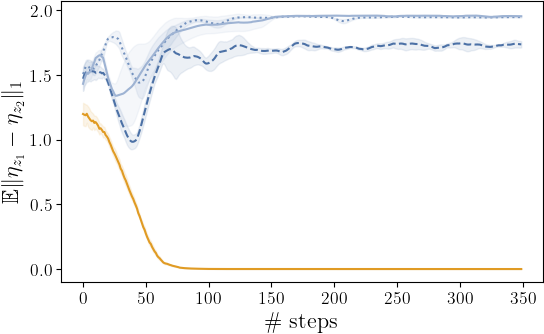

In [91]:
plt.rcParams.update({
    'text.latex.preamble': r'\usepackage{amsfonts}'
})
line_idxs = [(i, 1) for i in [0.0, 1.0, 2.0, 4.0]]

res = summary.time_statistics("scalar/main/dataset_avg_skill_l1_distance", line_idxs, use_min_len=True)
from matplotlib import pyplot as plt
import numpy as np


main_color = 0
shaded = get_shaded_colors(main_color, len(res), 0.6)

epsilons = reversed(sorted([k[0] for k in res.keys()]))

cmap = dict(zip(epsilons, shaded))


fig, ax = plt.subplots(1,1)
cmap[0.0] = COLORS[1]

steps = 350
linestyles = {
    0.0: "solid",
    0.5: "dashdot",
    1.0: "dashed",
    1.5: "--",
    2.0: "dotted",
    4.0: "solid"
}



for i, (k, v) in enumerate(res.items()):
    mu = v["mu"]
    std = np.sqrt(v["var"])
    # std = np.clip(std, 0, 20)
    
        # smooth mu
    mu = np.convolve(mu, np.ones(10), 'valid') / 10
    # smooth std
    std = np.convolve(std, np.ones(10), 'valid') / 10
    
    x = np.arange(len(mu))[:steps]
    mu = mu[:steps]
    std = std[:steps]
    
    
    ax.plot(x, mu, label=f"$\\epsilon={k[0]}$", color=cmap[k[0]],  linestyle=linestyles[k[0]])
    # plot error
    ax.fill_between(x, mu - std, mu + std, alpha=alpha, color=cmap[k[0]])

#plt.ylim([-100, 100])
ax.set_ylabel("$\\mathbb{E}\\| \eta_{z_1} - \eta_{z_2} \\|_1$")
ax.set_xlabel("\# steps")


os.makedirs(figdir, exist_ok=True)
fig.savefig(f"{figdir}/learned_lambda_l1.pdf", bbox_inches='tight')




In [92]:
res.keys()

dict_keys([(0.0, 1), (1.0, 1), (2.0, 1), (4.0, 1)])

In [93]:
epsilons

Experiments Int64Index([21, 27, 63, 76, 81], dtype='int64') has 5 runs
Experiments Int64Index([9, 11, 40, 62, 78], dtype='int64') has 5 runs
Experiments Int64Index([5, 39, 47, 65, 88], dtype='int64') has 5 runs
Experiments Int64Index([13, 33, 36, 69, 85], dtype='int64') has 5 runs
dict_keys([(0.0, 1), (1.0, 1), (2.0, 1), (4.0, 1)])
71


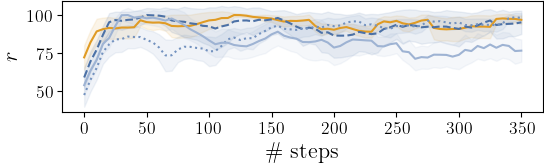

In [103]:
plt.rcParams.update({
    'text.latex.preamble': r'\usepackage{amsfonts}'
})



res = summary.time_statistics("scalar/main/eval/task_reward_mu", line_idxs, use_min_len=True)

print(res.keys())

from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,1, figsize=new_figsize)

main_color = 0
shaded = get_shaded_colors(main_color)

epsilons = reversed(sorted([k[0] for k in res.keys()]))



# cmap = dict(zip(epsilons, shaded))
# cmap[0.0] = COLORS[1]

steps = 350

for i, (k, v) in enumerate(res.items()):
    mu = v["mu"]
    std = np.sqrt(v["var"])
    # std = np.clip(std, 0, 20)
    x = np.arange(len(mu))
    

    # smooth mu
    mu = np.convolve(mu, np.ones(10), 'valid') / 10
    # smooth std
    std = np.convolve(std, np.ones(10), 'valid') / 10

    max = np.max(mu)
    mu *= 100/max
    std *= 100/max

    x = np.arange(len(mu))*5
    mu = mu[x<=steps]
    std = std[x<=steps]
    x = x[x<=steps]
    
    ax.plot(x, mu, label=f"$\\epsilon={k[0]}$", color=cmap[k[0]],  linestyle=linestyles[k[0]])
    # plot error
    ax.fill_between(x, mu - std, mu + std, alpha=alpha, color=cmap[k[0]])

#plt.ylim([-100, 100])
ax.set_ylabel("$r$")
ax.set_xlabel("\# steps")
print(len(x))
fig.savefig(f"{figdir}/learned_task_reward_mu_half.pdf", bbox_inches='tight')
# plt.legend()



In [104]:
# main_color = 5
# color_names = ["morange", "mblue", "mgreen", "mred", "mpurple", "mblack"]

# cmap = {
#     0.0: lighten_color(COLORS[main_color], 1.4),
#     0.5: lighten_color(COLORS[main_color], 1.2),
#     1.0: lighten_color(COLORS[main_color], 1.0),
#     2.0: lighten_color(COLORS[main_color], 0.8),
#     4.0: lighten_color(COLORS[main_color], 0.7),
#     8.0: lighten_color(COLORS[main_color], 0.6),
# }

# main_color = 4
# shaded = get_shaded_colors(main_color)
# cmap = dict(zip([1.0, 0.8, 0.6, 0.4, 0.2, 0.0], shaded))


# cnames = [f'mpurple{i}' for i in range(len(cmap))]


# latex_str = ""
# for i, (cname, (k, v)) in enumerate(zip(cnames, cmap.items())):
#     latex_str += f"\\definecolor{{{cname}}}{{rgb}}{{{v[0]:.3f}, {v[1]:.3f}, {v[2]:.3f}}}\n"

# print(latex_str)

# plt.plot(np.arange(10), np.arange(10), color=COLORS[main_color])

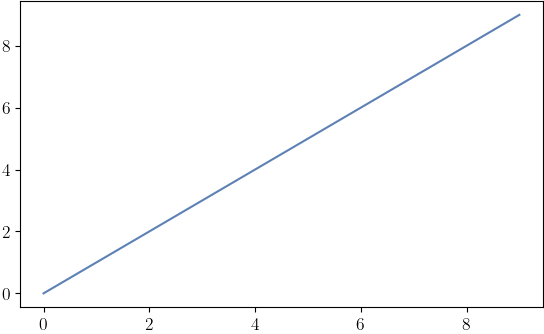

In [105]:
plt.plot(np.arange(10), np.arange(10), color=COLORS[0])

Experiments Int64Index([21, 27, 63, 76, 81], dtype='int64') has 5 runs
Experiments Int64Index([9, 11, 40, 62, 78], dtype='int64') has 5 runs
Experiments Int64Index([5, 39, 47, 65, 88], dtype='int64') has 5 runs
Experiments Int64Index([13, 33, 36, 69, 85], dtype='int64') has 5 runs


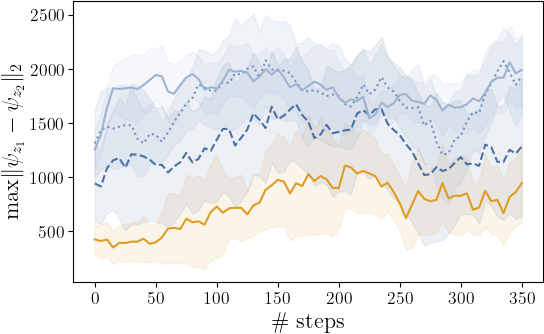

In [114]:
plt.rcParams.update({
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

res = summary.time_statistics("scalar/main/eval/skill_max_dist", line_idxs, use_min_len=True)
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,1)

main_color = 0
main_color = 0
shaded = get_shaded_colors(main_color, len(res))

epsilons = reversed(sorted([k[0] for k in res.keys()]))



# cmap = dict(zip(epsilons, shaded))
# cmap[0.0] = COLORS[1]


for i, (k, v) in enumerate(res.items()):
    mu = v["mu"]
    std = np.sqrt(v["var"])
    
    # smooth mu
    mu = np.convolve(mu, np.ones(10), 'valid') / 10
    # smooth std
    std = np.convolve(std, np.ones(10), 'valid') / 10
    
    
    # std = np.clip(std, 0, 20)
    x = np.arange(len(mu))*5
    mu = mu[x<=steps]
    std = std[x<=steps]
    x = x[x<=steps]
    
    
    ax.plot(x, mu, label=f"$\\epsilon={k[1]}$", color=cmap[k[0]],  linestyle=linestyles[k[0]])
    # plot error
    ax.fill_between(x, mu - std, mu + std, alpha=alpha, color=cmap[k[0]])

#plt.ylim([-100, 100])
ax.set_ylabel(r"$\mathrm{max} \| \psi_{z_1} - \psi_{z_2} \|_2$")
ax.set_xlabel("\# steps")


fig.savefig(f"{figdir}/learned_max_skill_distance.pdf", bbox_inches='tight')




Experiments Int64Index([21, 27, 63, 76, 81], dtype='int64') has 5 runs
Experiments Int64Index([9, 11, 40, 62, 78], dtype='int64') has 5 runs
Experiments Int64Index([5, 39, 47, 65, 88], dtype='int64') has 5 runs
Experiments Int64Index([13, 33, 36, 69, 85], dtype='int64') has 5 runs


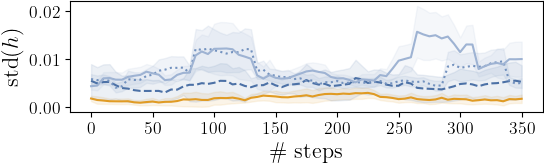

In [107]:
plt.rcParams.update({
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

res = summary.time_statistics("scalar/main/eval/height_std", line_idxs, use_min_len=True)
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,1, figsize=new_figsize)

main_color = 0
main_color = 0
shaded = get_shaded_colors(main_color, 4)

epsilons = reversed(sorted([k[0] for k in res.keys()]))


for i, (k, v) in enumerate(res.items()):
    mu = v["mu"]
    std = np.sqrt(v["var"])
    # std = np.clip(std, 0, 20)
    # smooth mu
    mu = np.convolve(mu, np.ones(10), 'valid') / 10
    # smooth std
    std = np.convolve(std, np.ones(10), 'valid') / 10
    
    
    # std = np.clip(std, 0, 20)
    x = np.arange(len(mu))*5
    mu = mu[x<=steps]
    std = std[x<=steps]
    x = x[x<=steps]
    
    ax.plot(x, mu, label=f"$\\epsilon={k[1]}$", color=cmap[k[0]],  linestyle=linestyles[k[0]])
    # plot error
    ax.fill_between(x, mu - std, mu + std, alpha=alpha, color=cmap[k[0]])

#plt.ylim([-100, 100])
ax.set_ylabel(r"$\mathrm{std}(h)$")
ax.set_xlabel("\# steps")
# ax.set_xlim([-10, 350])

fig.savefig(f"{figdir}/height_std_half.pdf", bbox_inches='tight')




Experiments Int64Index([21, 27, 63, 76, 81], dtype='int64') has 5 runs
Experiments Int64Index([9, 11, 40, 62, 78], dtype='int64') has 5 runs
Experiments Int64Index([5, 39, 47, 65, 88], dtype='int64') has 5 runs
Experiments Int64Index([13, 33, 36, 69, 85], dtype='int64') has 5 runs


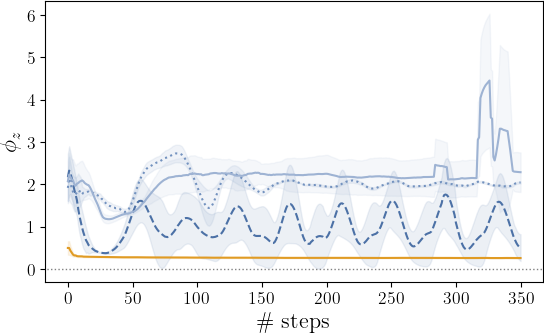

In [108]:
plt.rcParams.update({
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

res = summary.time_statistics("scalar/main/lambda_stage/phi_0", line_idxs, use_min_len=True)
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,1)

main_color = 0
main_color = 0
shaded = get_shaded_colors(main_color, 4)

epsilons = reversed(sorted([k[0] for k in res.keys()]))



for i, (k, v) in enumerate(res.items()):
    mu = v["mu"]
    std = np.sqrt(v["var"])
    # smooth mu
    mu = np.convolve(mu, np.ones(10), 'valid') / 10
    # smooth std
    std = np.convolve(std, np.ones(10), 'valid') / 10
    
    # std = np.clip(std, 0, 20)
    x = np.arange(len(mu))
    mu = mu[x<=steps]
    std = std[x<=steps]
    x = x[x<=steps]
    
    ax.plot(x, mu, label=f"$\\epsilon={k[1]}$", color=cmap[k[0]],  linestyle=linestyles[k[0]])
    # plot error
    ax.fill_between(x, mu - std, mu + std, alpha=alpha, color=cmap[k[0]])

#plt.ylim([-100, 100])
# plt.legend()
ax.set_ylabel(r"$\phi_z$")
ax.set_xlabel("\# steps")
lims = ax.get_xlim()
ax.hlines(0, -100, steps+100, color="grey", linestyle="dotted", linewidth=1)
ax.set_xlim(lims)

fig.savefig(f"{figdir}/phi_0.pdf", bbox_inches='tight')




[0.5 1.5 2.5 3.5 4.5]


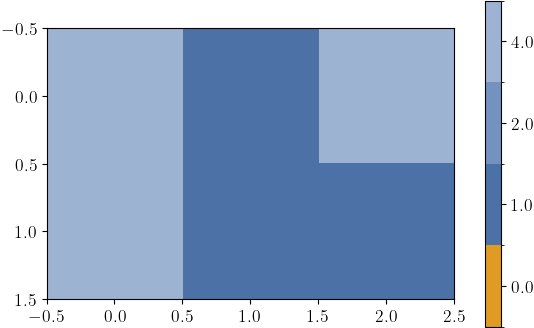

In [100]:
import matplotlib
from matplotlib.colors import ListedColormap

# Let's design a dummy land use field
A = np.reshape([7,2,13,7,2,2], (2,3))
vals = np.unique(A)

# Let's also design our color mapping: 1s should be plotted in blue, 2s in red, etc...
col_dict={1:cmap[0.0],
          2:cmap[1.0],
          3:cmap[2.0],
          4:cmap[4.0]}

# We create a colormar from our list of colors
cm = ListedColormap([col_dict[x] for x in col_dict.keys()])

# Let's also define the description of each category : 1 (blue) is Sea; 2 (red) is burnt, etc... Order should be respected here ! Or using another dict maybe could help.
labels = np.array(["0.0","1.0","2.0","4.0"])
len_lab = len(labels)

# prepare normalizer
## Prepare bins for the normalizer
norm_bins = np.sort([*col_dict.keys()]) + 0.5
norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)
print(norm_bins)
## Make normalizer and formatter
norm = matplotlib.colors.BoundaryNorm(norm_bins, len_lab, clip=True)
fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: labels[norm(x)])

# Plot our figure
fig,ax = plt.subplots()
im = ax.imshow(A, cmap=cm, norm=norm)

diff = norm_bins[1:] - norm_bins[:-1]
tickz = norm_bins[:-1] + diff / 2


cb = fig.colorbar(im, format=fmt, ticks=tickz)
fig.savefig("example_landuse.svg")
plt.show()

Experiments Int64Index([21, 27, 63, 76, 81], dtype='int64') has 5 runs
Experiments Int64Index([9, 11, 40, 62, 78], dtype='int64') has 5 runs
Experiments Int64Index([5, 39, 47, 65, 88], dtype='int64') has 5 runs
Experiments Int64Index([13, 33, 36, 69, 85], dtype='int64') has 5 runs


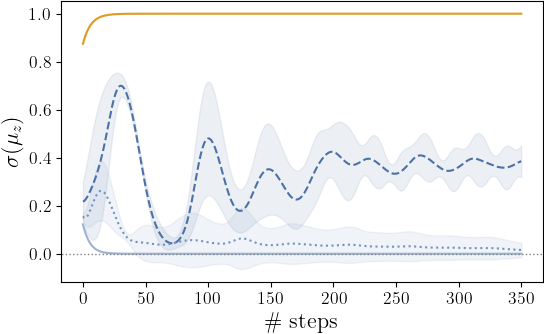

In [109]:
plt.rcParams.update({
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

res = summary.time_statistics("scalar/main/lambda_stage/sigmoid_lmbda_2", line_idxs, use_min_len=True)
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,1)

main_color = 0
main_color = 0
shaded = get_shaded_colors(main_color, 4)

epsilons = reversed(sorted([k[0] for k in res.keys()]))



for i, (k, v) in enumerate(res.items()):
    mu = v["mu"]
    std = np.sqrt(v["var"])
    # smooth mu
    mu = np.convolve(mu, np.ones(10), 'valid') / 10
    # smooth std
    std = np.convolve(std, np.ones(10), 'valid') / 10
    
    # std = np.clip(std, 0, 20)
    x = np.arange(len(mu))
    mu = mu[x<=steps]
    std = std[x<=steps]
    x = x[x<=steps]
    
    ax.plot(x, mu, label=f"$\\epsilon={k[1]}$", color=cmap[k[0]],  linestyle=linestyles[k[0]])
    # plot error
    ax.fill_between(x, mu - std, mu + std, alpha=alpha, color=cmap[k[0]])

#plt.ylim([-100, 100])
# plt.legend()
ax.set_ylabel(r"$\sigma(\mu_z)$")
ax.set_xlabel("\# steps")
lims = ax.get_xlim()
ax.hlines(0, -100, steps+100, color="grey", linestyle="dotted", linewidth=1)
ax.set_xlim(lims)

fig.savefig(f"{figdir}/sigmoid_lambda.pdf", bbox_inches='tight')




Experiments Int64Index([21, 27, 63, 76, 81], dtype='int64') has 5 runs
Experiments Int64Index([9, 11, 40, 62, 78], dtype='int64') has 5 runs
Experiments Int64Index([5, 39, 47, 65, 88], dtype='int64') has 5 runs
Experiments Int64Index([13, 33, 36, 69, 85], dtype='int64') has 5 runs


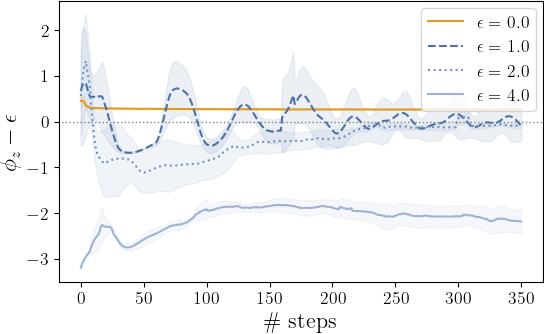

In [110]:
plt.rcParams.update({
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

res = summary.time_statistics("scalar/main/lambda_stage/violation_2", line_idxs, use_min_len=True)
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,1)

main_color = 0
main_color = 0
shaded = get_shaded_colors(main_color, 4)

epsilons = reversed(sorted([k[0] for k in res.keys()]))



for i, (k, v) in enumerate(res.items()):
    mu = v["mu"]
    std = np.sqrt(v["var"])
    # smooth mu
    mu = np.convolve(mu, np.ones(10), 'valid') / 10
    # smooth std
    std = np.convolve(std, np.ones(10), 'valid') / 10
    
    # std = np.clip(std, 0, 20)
    x = np.arange(len(mu))
    mu = mu[x<=steps]
    std = std[x<=steps]
    x = x[x<=steps]
    
    ax.plot(x, mu, label=f"$\\epsilon={k[0]}$", color=cmap[k[0]],  linestyle=linestyles[k[0]])
    # plot error
    ax.fill_between(x, mu - std, mu + std, alpha=alpha, color=cmap[k[0]])
    
    

#plt.ylim([-100, 100])
# plt.legend()
ax.set_ylabel(r"$\phi_z - \epsilon$")
ax.set_xlabel("\# steps")
lims = ax.get_xlim()
ax.hlines(0, -100, steps+100, color="grey", linestyle="dotted", linewidth=1)
ax.set_xlim(lims)



fig.savefig(f"{figdir}/violation.pdf", bbox_inches='tight')
fig.legend()



In [57]:
res = summary.time_statistics("scalar/main/lambda_stage/violation_2", [(1.0, 10)], use_min_len=True)


Experiments Int64Index([15, 56, 60, 75, 83], dtype='int64') has 5 runs


{(1.0,
  10): {'mu': array([-6.67003274e-01,  1.26664281e-01, -6.69023991e-02, -1.46911204e-01,
          5.31385899e-01, -2.81431198e-01, -1.38826430e-01, -2.79674470e-01,
         -2.88284957e-01, -2.47388646e-01, -1.83465838e-01, -1.44494176e-01,
         -1.33238018e-01, -4.12523746e-03,  4.78724957e-01,  1.97269440e-01,
          4.13019180e-01,  6.08373523e-01,  8.93881023e-01,  6.79770112e-01,
          1.41886425e+00,  9.32909191e-01,  6.23806357e-01,  1.25764704e+00,
          9.70465481e-01,  1.02009034e+00,  1.05346918e+00,  5.74241877e-01,
          1.34933591e-01, -3.94174457e-02, -1.57444417e-01, -2.82016933e-01,
         -4.26203549e-01, -4.94182676e-01, -5.53897440e-01, -5.78188837e-01,
         -6.10274315e-01, -6.18993819e-01, -6.24123335e-01, -6.32527590e-01,
         -6.27911091e-01, -6.13371015e-01, -6.10322237e-01, -5.87118268e-01,
         -5.90146065e-01, -5.71535110e-01, -5.18104672e-01, -4.97153521e-01,
         -4.61111367e-01, -3.99440646e-01, -4.06777471e-0

Experiments Int64Index([27, 51, 134], dtype='int64') has 1 runs
Experiments Int64Index([81, 91, 100], dtype='int64') has 1 runs
Experiments Int64Index([2, 129, 139], dtype='int64') has 1 runs
Experiments Int64Index([53, 56, 120], dtype='int64') exception..
'Experiment' object has no attribute 'values'
Experiments Int64Index([42, 77, 93], dtype='int64') has 1 runs
Experiments Int64Index([12, 23, 58], dtype='int64') has 2 runs
Experiments Int64Index([27, 51, 134], dtype='int64') has 1 runs
Experiments Int64Index([81, 91, 100], dtype='int64') has 1 runs
Experiments Int64Index([2, 129, 139], dtype='int64') has 1 runs
Experiments Int64Index([53, 56, 120], dtype='int64') exception..
'Experiment' object has no attribute 'values'
Experiments Int64Index([42, 77, 93], dtype='int64') has 1 runs
Experiments Int64Index([12, 23, 58], dtype='int64') has 2 runs
Experiments Int64Index([27, 51, 134], dtype='int64') has 1 runs
Experiments Int64Index([81, 91, 100], dtype='int64') has 1 runs
Experiments In

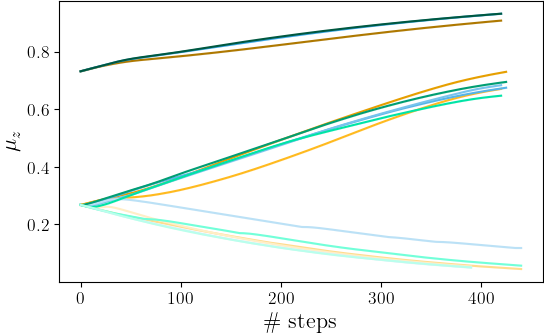

In [27]:
plt.rcParams.update({
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

res = summary.time_statistics("scalar/main/lambda_stage/sigmoid_lmbda_0", [(5.0, None, 0.005, 2.0)], use_min_len=False)
res1 = summary.time_statistics("scalar/main/lambda_stage/sigmoid_lmbda_1", [(5.0, None, 0.005, 2.0)], use_min_len=False)
res2 = summary.time_statistics("scalar/main/lambda_stage/sigmoid_lmbda_2", [(5.0, None, 0.005, 2.0)], use_min_len=False)

from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,1)


cmap = {
    0.0: lighten_color(COLORS[0], 1.2),
    0.5: lighten_color(COLORS[0], 1.0),
    1.0: lighten_color(COLORS[0], 0.8),
    2.0: lighten_color(COLORS[0], 0.6),
    4.0: lighten_color(COLORS[0], 0.4),
    8.0: lighten_color(COLORS[0], 0.2),
}

for i, r in enumerate([res, res1, res2]):
    cmap = {
        0.0: lighten_color(COLORS[i], 1.2),
        0.5: lighten_color(COLORS[i], 1.0),
        1.0: lighten_color(COLORS[i], 0.8),
        2.0: lighten_color(COLORS[i], 0.6),
        4.0: lighten_color(COLORS[i], 0.4),
        8.0: lighten_color(COLORS[i], 0.2),
    }


    for i, (k, v) in enumerate(r.items()):
        mu = v["mu"]
        std = np.sqrt(v["var"])
        # std = np.clip(std, 0, 20)
        x = np.arange(len(mu))
        ax.plot(x, mu, label=f"$\\epsilon={k[1]}$", color=cmap[k[1]])
        # plot error
        ax.fill_between(x, mu - std, mu + std, alpha=0.1, color=cmap[k[1]])

#plt.ylim([-100, 100])
ax.set_ylabel("$\mu_z$")
ax.set_xlabel("\# steps")


fig.savefig("figures/mu_progress.pdf", bbox_inches='tight')




Text(0.5, 0, '\\# steps')

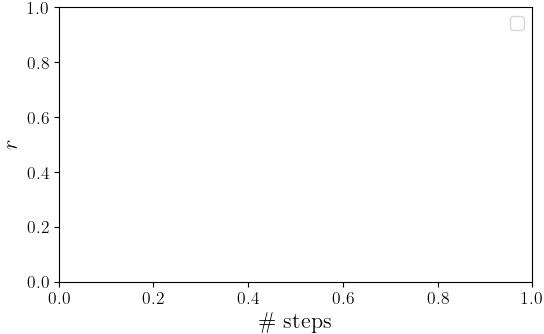

In [12]:


res = summary.time_statistics("scalar/main/eval/task_reward_mu", [(None, 0.1, True)], use_min_len=True)
from matplotlib import pyplot as plt
import numpy as np

for i, (k, v) in enumerate(res.items()):
    mu = v["mu"]
    std = np.sqrt(v["var"])
    # std = np.clip(std, 0, 20)
    x = np.arange(len(mu))
    plt.plot(x, mu, label=f"$\\epsilon={k[0]}$")
    # plot error
    plt.fill_between(x, mu - std, mu + std, alpha=0.1)

#plt.ylim([-100, 100])
plt.legend()
plt.ylabel("$r$")
plt.xlabel("\# steps")


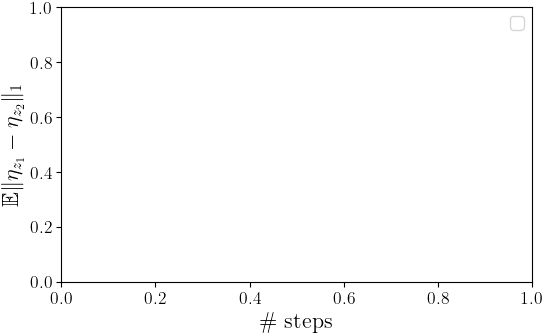

In [13]:
plt.rcParams.update({
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

res = summary.time_statistics("scalar/main/lambda_stage/violation_0", [(None, 0.1, False)], use_min_len=False)
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,1)

for i, (k, v) in enumerate(res.items()):
    mu = v["mu"]
    std = np.sqrt(v["var"])
    # std = np.clip(std, 0, 20)
    x = np.arange(len(mu))
    ax.plot(x, mu, label=f"$\\epsilon={k[0]}$", color=COLORS[i])
    # plot error
    ax.fill_between(x, mu - std, mu + std, alpha=0.1, color=COLORS[i])

#plt.ylim([-100, 100])
plt.legend()
ax.set_ylabel("$\\mathbb{E}\\| \eta_{z_1} - \eta_{z_2} \\|_1$")
ax.set_xlabel("\# steps")


fig.savefig("figures/violations.pdf", bbox_inches='tight')




Experiments Int64Index([5, 24, 38], dtype='int64') has 2 runs
Experiments Int64Index([48, 59, 74], dtype='int64') has 3 runs
Experiments Int64Index([41, 42, 69], dtype='int64') has 1 runs
Experiments Int64Index([4, 63, 86], dtype='int64') has 3 runs
Experiments Int64Index([22, 72, 82], dtype='int64') has 3 runs


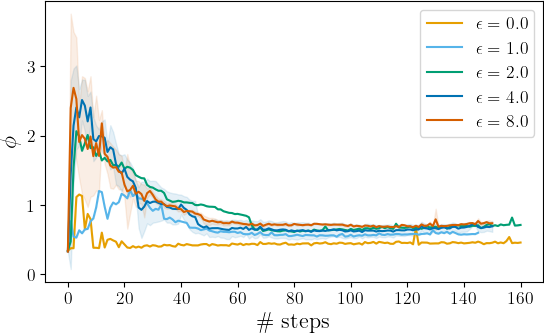

In [116]:
plt.rcParams.update({
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

res = summary.time_statistics("scalar/main/lambda_stage/phi_0", [(None, 0.1, False)], use_min_len=False)
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,1)

for i, (k, v) in enumerate(res.items()):
    mu = v["mu"]
    std = np.sqrt(v["var"])
    # std = np.clip(std, 0, 20)
    x = np.arange(len(mu))
    ax.plot(x, mu, label=f"$\\epsilon={k[0]}$", color=COLORS[i])
    # plot error
    ax.fill_between(x, mu - std, mu + std, alpha=0.1, color=COLORS[i])

#plt.ylim([-100, 100])
plt.legend()
ax.set_ylabel("$\\phi$")
ax.set_xlabel("\# steps")


fig.savefig("figures/violations.pdf", bbox_inches='tight')




# Plotting Recompute

In [2]:
# plotting recompute
import os
import smart_settings
import solo_legged_gym
import solo_legged_gym.envs # needed
from smodice import utils
import sys
sys.argv = ['', '']
import torch
import numpy as np
import pickle
from smodice.doi_pytorch_v2 import DOI
working_dir = "/is/cluster/fast/mvlastelica/doi-offline-skill/corl_learned_lambda_solo_masked_value/working_directories/66"

os.listdir(working_dir)


config = smart_settings.load(os.path.join(working_dir, "config.yaml"), make_immutable=False)

ckpt = torch.load(os.path.join(working_dir, "checkpoints/last.pth.tar"))

expert_env, expert_dataset, offline_dataset, actions_max, actions_min = utils.get_solo_env_and_data(config)
env = expert_env

initial_obs_dataset, dataset, dataset_statistics = utils.dice_combined_dataset(expert_env, env, num_expert_traj=config['num_expert_traj'], 
                                                                                    num_offline_traj=config['num_offline_traj'],
standardize_observation=config['standardize_obs'], absorbing_state=config['absorbing_state'],
    standardize_reward=config['standardize_reward'], offline_dataset=offline_dataset, expert_dataset=expert_dataset)


# Load expert dataset
if not config['mismatch']:
    print(f'Loading expert dataset...')
    traj_iterator = utils.sequence_dataset(expert_env, dataset=expert_dataset)
    expert_traj = next(traj_iterator)
else:
    # Load mismatch expert dataset 
    demo_file = f"envs/demos/{config['env_name']}_{config['dataset']}.pkl"
    demo = pickle.load(open(demo_file, 'rb'))
    if 'ant' in config['env_name']: 
        expert_obs = np.array(demo['observations'][:1000])
        expert_actions = np.array(demo['actions'][:1000])
        expert_next_obs = np.array(demo['next_observations'][:1000])
    else:
        expert_obs = np.array(demo['observations'][0])
        expert_actions = np.array(demo['actions'][0])
        expert_next_obs = np.array(demo['next_observations'][0])
    expert_traj = {'observations': expert_obs, 'actions': expert_actions, 'next_observations': expert_next_obs}


# Normalize expert observations and potentially add absorbing state
if config['standardize_obs']:
    expert_obs_dim = expert_traj['observations'].shape[1]
    expert_traj['observations'] = (expert_traj['observations'] - dataset_statistics['observation_mean'][:expert_obs_dim]) / (dataset_statistics['observation_std'][:expert_obs_dim] + 1e-10)
    if 'next_observations' in expert_traj:
        expert_traj['next_observations'] = (expert_traj['next_observations'] - dataset_statistics['observation_mean']) / (dataset_statistics['observation_std'] + 1e-10)
if config['absorbing_state']:
    expert_traj = utils.add_absorbing_state(expert_traj)
if config['use_policy_entropy_constraint'] or config['use_data_policy_entropy_constraint']:
    if config['target_entropy'] is None:
        config['target_entropy'] = -np.prod(env.action_space.shape)



Importing module 'gym_38' (/home/mvlastelica/Projects/successor-features/.venv/lib/python3.8/site-packages/isaacgym/_bindings/linux-x86_64/gym_38.so)
Setting GYM_USD_PLUG_INFO_PATH to /home/mvlastelica/Projects/successor-features/.venv/lib/python3.8/site-packages/isaacgym/_bindings/linux-x86_64/usd/plugInfo.json
PyTorch version 1.13.1+cu116
Device count 1
/home/mvlastelica/Projects/successor-features/.venv/lib/python3.8/site-packages/isaacgym/_bindings/src/gymtorch


Using /home/mvlastelica/.cache/torch_extensions/py38_cu116 as PyTorch extensions root...
Emitting ninja build file /home/mvlastelica/.cache/torch_extensions/py38_cu116/gymtorch/build.ninja...
Building extension module gymtorch...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


ninja: no work to do.


Loading extension module gymtorch...
No module named 'flow'
No module named 'carla'
pybullet build time: May 20 2022 19:44:17


Setting seed: 0
Making env... solo12
Setting seed: 42
Not connected to PVD
+++ Using GPU PhysX
Physics Engine: PhysX
Physics Device: cuda:0
GPU Pipeline: enabled


MESA-INTEL: warning: Performance support disabled, consider sysctl dev.i915.perf_stream_paranoid=0



Expert Traj 200, Expert Size 49800
Offline Traj 2000, Offline Size 996000
Loading expert dataset...


In [4]:
data_loader = utils.SmodiceLoader(config.batch_size, 
                                            dataset=dataset,
                                            initial_obs_dataset=initial_obs_dataset,
                                            dataset_statistics=dataset_statistics,
                                            shuffle=True)


from smodice.doi_pytorch_v2 import ValueSkillNetwork, ValueNetwork
import functools
observation_spec = dataset['observations'].shape[1]

In [7]:
agent = DOI(observation_spec, dataset['actions'].shape[-1], None, config)
agent.load_state_dict(ckpt['state_dict'])
agent.compute_all_w_e(data_loader, 1000)

AttributeError: 'DOI' object has no attribute 'expert_w_e'

In [8]:
from smodice.doi_pytorch_v2 import stable_softmax







def compute_expert_w_e(self):
    data_loader.set_shuffle(False)
    evs = []
    with torch.no_grad():
        for batch in iter(data_loader):
            v_values, _ = self._expert_v_network((batch['observations'],))
            next_v_values, _ = self._expert_v_network((batch['next_observations'],))
            expert_log_ratio  = batch['classifier_rewards']
            e_v = expert_log_ratio.detach()  + (1 - batch['terminals'][:, None]) * self._gamma * next_v_values - v_values
            evs.append(e_v)
                
            
        evs = torch.cat(evs, dim=0)
        self.expert_w_e = stable_softmax(evs, dim=0).detach().reshape(1,-1)
        
compute_expert_w_e(agent)   

KeyError: 'classifier_rewards'

In [ ]:
def compute_all_w_e(self, data_loader, iteration):
    data_loader.set_shuffle(False)
    train_batch_size = data_loader._batch_size
    data_loader.set_batch_size(data_loader._batch_size * 2 // len(self._skills))
    w_es = []
    e_vs_expert = []
    # TODO this can break if batch size is too large
    with torch.no_grad():
        for batch in iter(data_loader):
            pre_unpacked_batch = batch
            batch = self._unpack_batch(batch)
            observation = batch['observations'].to(self.device)
            eta_e = self.expert_w_e[:, batch['idxs'].to(self.expert_w_e.device).flatten()].to(self.device).T
            log_eta_e = torch.log((eta_e + 1e-24) * self._num_skills) / self._num_skills
            next_observation = batch['next_observations'].to(self.device)
            terminal = batch['terminals'].unsqueeze(1).to(self.device).reshape(-1, 1)

            if self._expert_v_network:
                pre_unpack_obs = pre_unpacked_batch['observations'].to(self.device)
                pre_unpack_obs_next = pre_unpacked_batch['next_observations'].to(self.device)
                pre_unpack_expert_log_ratio = pre_unpacked_batch['classifier_rewards'].to(self.device).reshape(-1, 1)
                pre_unpack_terminal = pre_unpacked_batch['terminals'].to(self.device).reshape(-1, 1)
                v, _ = self._expert_v_network((pre_unpack_obs,))
                v_next, _ = self._expert_v_network((pre_unpack_obs_next,))
                e_v_expert =  pre_unpack_expert_log_ratio + (1 - pre_unpack_terminal) * self._gamma * v_next - v
                e_vs_expert.append(e_v_expert)

            e_v = self._compute_e_v(batch, log_eta_e, observation,
                                    next_observation, terminal, batch['skills'], iteration).detach()
            # extracting importance weight (Equation 21 in the paper)
            if self._f == "kl":
                # w_e = self._softmax_by_skill(e_v.detach() / self._temperature, skills)
                w_e = e_v.detach() / self._temperature
            else:
                w_e = self._f_star_prime(e_v, batch['skills'])
            w_e = w_e.reshape(len(self._skills),  -1).T
            w_es.append(w_e)

        w_es = torch.cat(w_es, dim=0).cpu()
        if self._expert_v_network:
            e_vs_expert = torch.cat(e_vs_expert, dim=0).cpu()
            self.expert_w_e[:] = stable_softmax(e_vs_expert.flatten(), 0)[None]
        else:
            self.expert_w_e[:] = stable_softmax(w_es[:, self._num_skills:].T, -1)

        data_loader.set_batch_size(train_batch_size)

        w_es = stable_softmax(w_es.T, dim=-1)
        if hasattr(self, "_untruncated_w_e"):
            self._untruncated_w_e[:] = w_es
        else:
            self._untruncated_w_e = w_es

In [4]:
v_network.load_state_dict(ckpt['state_dict']['network_states']['v'])

<All keys matched successfully>

In [5]:
agent = DOI(observation_spec, dataset['actions'].shape[-1], None, config)

agent.load_state_dict(ckpt['state_dict'])


In [7]:
agent.compute_all_w_e(data_loader, 1000)

KeyError: 'classifier_rewards'

# Plotting Generic

100%|██████████| 72/72 [00:04<00:00, 15.04it/s]


In [23]:
summary = ExperimentSummary(experiments)


In [24]:
idxs = summary.unique_indexes()
idxs


[(0.0, 0.0001, False),
 (0.0, 0.0001, True),
 (0.0, 0.0005, False),
 (0.0, 0.0005, True),
 (0.1, 0.0001, False),
 (0.1, 0.0001, True),
 (0.1, 0.0005, False),
 (0.1, 0.0005, True),
 (0.2, 0.0001, False),
 (0.2, 0.0001, True),
 (0.2, 0.0005, False),
 (0.2, 0.0005, True),
 (0.5, 0.0001, False),
 (0.5, 0.0001, True),
 (0.5, 0.0005, False),
 (0.5, 0.0005, True),
 (1.0, 0.0001, False),
 (1.0, 0.0001, True),
 (1.0, 0.0005, False),
 (1.0, 0.0005, True),
 (2.0, 0.0001, False),
 (2.0, 0.0001, True),
 (2.0, 0.0005, False),
 (2.0, 0.0005, True)]

In [22]:
keys = summary.experiments[0].values.keys()
keys
for key in keys:
    print(key)
    if "eval" in key:
        pass


scalar/0
scalar/50
scalar/75
scalar/90
scalar/main/dataset_avg_skill_l1_distance
scalar/main/dataset_entropy
scalar/main/dataset_max_logp
scalar/main/dataset_max_p
scalar/main/dataset_min_logp
scalar/main/dataset_min_skill_l1_distance
scalar/main/discriminator_loss
scalar/main/discriminator_reward
scalar/main/ent_coeff
scalar/main/ent_coeff_loss
scalar/main/eval/disc_reward
scalar/main/eval/disdain
scalar/main/eval/height_std
scalar/main/eval/logp
scalar/main/eval/skill_avg_dist
scalar/main/eval/skill_max_dist
scalar/main/eval/task_reward_mu
scalar/main/eval/task_reward_std
scalar/main/eval_iter
scalar/main/expert_log_ratio
scalar/main/lambda_stage/lmbda_0
scalar/main/lambda_stage/lmbda_1
scalar/main/lambda_stage/lmbda_2
scalar/main/lambda_stage/lmbda_3
scalar/main/lambda_stage/lmbda_4
scalar/main/lambda_stage/phi_0
scalar/main/lambda_stage/phi_1
scalar/main/lambda_stage/phi_2
scalar/main/lambda_stage/phi_3
scalar/main/lambda_stage/phi_4
scalar/main/lambda_stage/sigmoid_lmbda_0
scalar/

In [20]:
summary.params_of_interest


['epsilon', 'lambda_lr', 'masked_value_net']

In [26]:
for name, group in summary._group_by_params(summary.params_of_interest):
    print(group.index)


Int64Index([5, 39, 53], dtype='int64')
Int64Index([7, 9, 12], dtype='int64')
Int64Index([28, 31, 49], dtype='int64')
Int64Index([55, 59, 65], dtype='int64')
Int64Index([25, 30, 35], dtype='int64')
Int64Index([15, 18, 47], dtype='int64')
Int64Index([13, 56, 62], dtype='int64')
Int64Index([10, 20, 63], dtype='int64')
Int64Index([29, 36, 57], dtype='int64')
Int64Index([44, 51, 69], dtype='int64')
Int64Index([42, 48, 52], dtype='int64')
Int64Index([23, 37, 70], dtype='int64')
Int64Index([22, 68, 71], dtype='int64')
Int64Index([0, 24, 27], dtype='int64')
Int64Index([3, 4, 45], dtype='int64')
Int64Index([11, 32, 61], dtype='int64')
Int64Index([6, 50, 67], dtype='int64')
Int64Index([1, 17, 64], dtype='int64')
Int64Index([2, 16, 26], dtype='int64')
Int64Index([21, 43, 60], dtype='int64')
Int64Index([8, 19, 54], dtype='int64')
Int64Index([33, 40, 58], dtype='int64')
Int64Index([14, 38, 46], dtype='int64')
Int64Index([34, 41, 66], dtype='int64')


In [27]:
summary.print_values()
keys = summary.experiments[0].values.keys()
keys


dict_keys(['scalar/main/eval/disc_reward', 'scalar/main/eval/disdain', 'scalar/main/eval/logp', 'scalar/main/eval/skill_avg_dist', 'scalar/main/eval/skill_max_dist', 'scalar/main/eval/task_reward_mu', 'scalar/main/eval/task_reward_std', 'scalar/main/eval_iter', 'scalar/main/successor_eval/succ_avg_dist', 'scalar/main/successor_eval/succ_max_dist', 'scalar/main/successor_eval/succ_min_dist'])


dict_keys(['scalar/main/eval/disc_reward', 'scalar/main/eval/disdain', 'scalar/main/eval/logp', 'scalar/main/eval/skill_avg_dist', 'scalar/main/eval/skill_max_dist', 'scalar/main/eval/task_reward_mu', 'scalar/main/eval/task_reward_std', 'scalar/main/eval_iter', 'scalar/main/successor_eval/succ_avg_dist', 'scalar/main/successor_eval/succ_max_dist', 'scalar/main/successor_eval/succ_min_dist'])

In [30]:
summary.unique_indexes()


[(0.0, 0.1, False),
 (0.0, 0.1, True),
 (0.0, 0.5, False),
 (0.0, 0.5, True),
 (0.0, 1.0, False),
 (0.0, 1.0, True),
 (1.0, 0.1, False),
 (1.0, 0.1, True),
 (1.0, 0.5, False),
 (1.0, 0.5, True),
 (1.0, 1.0, False),
 (1.0, 1.0, True),
 (2.0, 0.1, False),
 (2.0, 0.1, True),
 (2.0, 0.5, False),
 (2.0, 0.5, True),
 (2.0, 1.0, False),
 (2.0, 1.0, True),
 (4.0, 0.1, False),
 (4.0, 0.1, True),
 (4.0, 0.5, False),
 (4.0, 0.5, True),
 (4.0, 1.0, False),
 (4.0, 1.0, True),
 (8.0, 0.1, False),
 (8.0, 0.1, True),
 (8.0, 0.5, False),
 (8.0, 0.5, True),
 (8.0, 1.0, False),
 (8.0, 1.0, True)]

In [32]:
for key in keys:
    print(key)
    if "eval" in key:
        pass
        #print(key)


scalar/0
scalar/50
scalar/75
scalar/90
scalar/main/dataset_avg_skill_l1_distance
scalar/main/dataset_entropy
scalar/main/dataset_max_logp
scalar/main/dataset_max_p
scalar/main/dataset_min_logp
scalar/main/dataset_min_skill_l1_distance
scalar/main/discriminator_loss
scalar/main/discriminator_reward
scalar/main/ent_coeff
scalar/main/ent_coeff_loss
scalar/main/eval/disc_reward
scalar/main/eval/disdain
scalar/main/eval/height_std
scalar/main/eval/logp
scalar/main/eval/skill_avg_dist
scalar/main/eval/skill_max_dist
scalar/main/eval/task_reward_mu
scalar/main/eval/task_reward_std
scalar/main/eval_iter
scalar/main/expert_log_ratio
scalar/main/lambda_stage/lmbda_0
scalar/main/lambda_stage/lmbda_1
scalar/main/lambda_stage/lmbda_2
scalar/main/lambda_stage/lmbda_3
scalar/main/lambda_stage/lmbda_4
scalar/main/lambda_stage/phi_0
scalar/main/lambda_stage/phi_1
scalar/main/lambda_stage/phi_2
scalar/main/lambda_stage/phi_3
scalar/main/lambda_stage/phi_4
scalar/main/lambda_stage/sigmoid_lmbda_0
scalar/

In [ ]:
COLORS = "#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"
import matplotlib.pyplot as plt
from tueplots import bundles
from tueplots import figsizes

plt.rcParams.update(bundles.neurips2023())
figsize = figsizes.neurips2023(ncols=1)
plt.rcParams.update(figsize)
import numpy as np


Experiments Int64Index([7, 9, 12], dtype='int64') has 3 runs
Experiments Int64Index([15, 18, 47], dtype='int64') has 3 runs
Experiments Int64Index([44, 51, 69], dtype='int64') has 3 runs
Experiments Int64Index([0, 24, 27], dtype='int64') has 3 runs
Experiments Int64Index([1, 17, 64], dtype='int64') has 3 runs
Experiments Int64Index([33, 40, 58], dtype='int64') has 3 runs


Text(0.5, 0, '\\# steps')

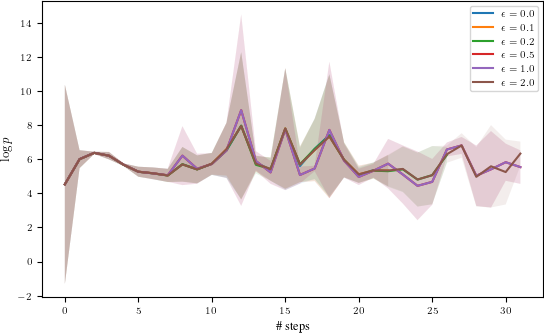

In [35]:
w_disc = 100.0
w_disdain = 0.001


res = summary.time_statistics("scalar/main/eval/task_reward_mu", [(None, 0.0001, True)], use_min_len=True)
from matplotlib import pyplot as plt
import numpy as np

for i, (k, v) in enumerate(res.items()):
    mu = v["mu"]
    std = np.sqrt(v["var"])
    # std = np.clip(std, 0, 20)
    x = np.arange(len(mu))
    plt.plot(x, mu, label=f"$\\epsilon={k[0]}$")
    # plot error
    plt.fill_between(x, mu - std, mu + std, alpha=0.1)

#plt.ylim([-100, 100])
plt.legend()
plt.ylabel("$\log p$")
plt.xlabel("\# steps")


In [124]:
experiments[0].values.keys()


dict_keys(['scalar/main/eval/disc_reward', 'scalar/main/eval/disdain', 'scalar/main/eval/logp', 'scalar/main/eval/skill_avg_dist', 'scalar/main/eval/skill_max_dist', 'scalar/main/eval/task_reward_mu', 'scalar/main/eval/task_reward_std', 'scalar/main/successor_eval/succ_avg_dist', 'scalar/main/successor_eval/succ_max_dist', 'scalar/main/successor_eval/succ_min_dist', 'scalar/main/w_e', 'scalar/main/w_e_expert', 'scalar/main/w_e_offline', 'scalar/main/w_e_ratio'])

Experiments Int64Index([30, 42], dtype='int64') has 2 runs
Experiments Int64Index([67, 95], dtype='int64') has 2 runs
Experiments Int64Index([61, 72], dtype='int64') has 1 runs
Experiments Int64Index([27, 47], dtype='int64') has 2 runs
Experiments Int64Index([4, 22], dtype='int64') has 1 runs
Experiments Int64Index([6, 94], dtype='int64') has 1 runs
Plotting....
Plotting....
Plotting....
Plotting....
Plotting....
Plotting....


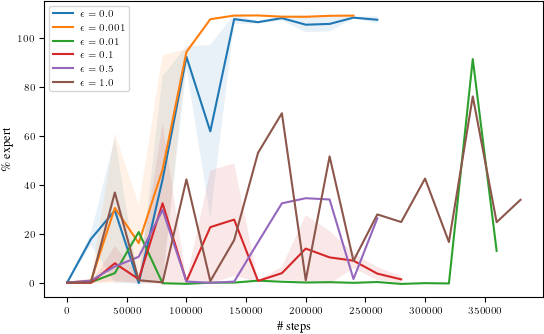

In [125]:
w_disc = 100.0
w_disdain = 0.001


from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1)
res = summary.time_statistics(
    "scalar/main/eval/task_reward_mu", [(None, w_disc, w_disdain)]
)

for k, v in res.items():
    print("Plotting....")
    mu = v["mu"]
    std = np.sqrt(v["var"])
    # std = np.clip(std, 0, 20)
    x = np.arange(len(mu)) * 20_000
    ax.plot(x, mu, label=f"$\epsilon={k[0]}$")

    # plot error
    ax.fill_between(x, mu - std, mu + std, alpha=0.1)

ax.set_ylabel("\% expert")
ax.set_xlabel("\# steps")
plt.legend()


In [ ]:
res = summary.time_statistics("scalar/main/eval/logp", [(None, 1.0, 0.001)])
from matplotlib import pyplot as plt
import numpy as np

for k, v in res.items():
    mu = v["mu"]
    std = np.sqrt(v["var"])
    plt.plot(mu, label=k)
    # plot error
    plt.fill_between(np.arange(len(mu)), mu - std, mu + std, alpha=0.2)
plt.legend()


In [56]:
figsizes.neurips2023()


{'figure.figsize': (5.5, 1.699593469062211),
 'figure.constrained_layout.use': True,
 'figure.autolayout': False,
 'savefig.bbox': 'tight',
 'savefig.pad_inches': 0.015}

In [57]:
v["mu"]


array([ 0.11749776, -0.17245467, -0.26012   , -0.62949306, -1.1698842 ,
       -0.40572414,  0.13482387, -0.15770008,  0.18751621,  0.15178299,
        0.5165896 ,  0.05910087], dtype=float32)

In [10]:
# time_stats.keys()


def smoothing(x, window_len=11, window="hanning"):
    x = np.array(x)
    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")
    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")
    if window_len < 3:
        return x
    if window not in ["flat", "hanning", "hamming", "bartlett", "blackman"]:
        raise ValueError(
            "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"
        )
    s = np.r_[x[window_len - 1 : 0 : -1], x, x[-2 : -window_len - 1 : -1]]
    if window == "flat":  # moving average
        w = np.ones(window_len, "d")
    else:
        w = eval(f"np.{window}(window_len)")
    y = np.convolve(w / w.sum(), s, mode="valid")
    return y[int(window_len / 2 - 1) : -int(window_len / 2)]


def eps_name(idx):
    return f"\eps={idx[2]}"


named_time_stats = {eps_name(idx): time_stats[idx] for idx in time_stats.keys()}

# plot for paper with color scheme
import matplotlib.pyplot as plt
from tueplots import bundles
from tueplots import figsizes

plt.rcParams.update(bundles.neurips2023())
figsize = figsizes.neurips2023(ncols=1)
plt.rcParams.update(figsize)
import numpy as np


fig, ax = plt.subplots()
for i, (k, v) in enumerate(named_time_stats.items()):
    ax.plot(v["mu"], label=k)
    # plot error bars
    v["std"] = v["var"]
    x = np.arange(len(v["mu"]))
    ax.fill_between(
        x, v["mu"] - v["std"], v["mu"] + v["std"], alpha=0.2, color=COLORS[i]
    )


NameError: name 'time_stats' is not defined

In [82]:
v["std"]


array([3.5418282e+00, 1.1563106e-02, 2.8614756e-01, 1.0983557e-03,
       2.0247594e-02, 3.1483926e-02, 1.5296240e-02, 5.5156448e-09,
       1.2516171e-02, 3.6110736e-02], dtype=float32)